In [1]:

!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahid09092005","key":"d4dd1ebbb2860e4731f20f7fea24b383"}'}

In [ ]:
#Copy the kaggle.json to created folder
!/content/kaggle.json ~/.kaggle/

#permisson for the json to act
! chmod 600 /content/kaggle.json ~/.kaggle/

/bin/bash: line 1: /content/kaggle.json: Permission denied
chmod: cannot access '/root/.kaggle/': No such file or directory


In [ ]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

Dataset URL: https://www.kaggle.com/datasets/piyushgoyal443/red-wine-dataset
License(s): DbCL-1.0
  0% 0.00/29.4k [00:00<?, ?B/s]
100% 29.4k/29.4k [00:00<00:00, 51.8MB/s]


In [ ]:
!unzip /content/red-wine-dataset.zip

Archive:  /content/red-wine-dataset.zip
  inflating: wineQualityInfo.txt     
  inflating: wineQualityReds.csv     


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sample=pd.read_csv('/content/wineQualityReds.csv')

In [ ]:
sample.sample(5)

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1000,1001,7.5,0.43,0.30,2.2,0.062,6.0,12.0,0.99495,3.44,0.72,11.5,7
1182,1183,10.2,0.40,0.40,2.5,0.068,41.0,54.0,0.99754,3.38,0.86,10.5,6
1137,1138,10.4,0.52,0.45,2.0,0.080,6.0,13.0,0.99774,3.22,0.76,11.4,6
68,69,9.3,0.32,0.57,2.0,0.074,27.0,65.0,0.99690,3.28,0.79,10.7,5
664,665,12.1,0.40,0.52,2.0,0.092,15.0,54.0,1.00000,3.03,0.66,10.2,5


In [ ]:
cols=['quality','sulphates','alcohol']
df=sample[cols]

In [ ]:
df.sample(4)

,quality,sulphates,alcohol
1510,6,0.77,9.7
113,6,0.67,9.7
266,4,0.72,9.8
483,5,1.06,9.4


In [ ]:
df['quality'] = (df['quality'] == 0) | (df['quality'] == 1)


<ipython-input-39-3e2d252645c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quality'] = (df['quality'] == 0) | (df['quality'] == 1)


In [ ]:
df['quality']==

0       True
1       True
2       True
3       True
4       True
        ... 
1594    True
1595    True
1596    True
1597    True
1598    True
Name: quality, Length: 1599, dtype: bool

<Axes: xlabel='alcohol', ylabel='sulphates'>

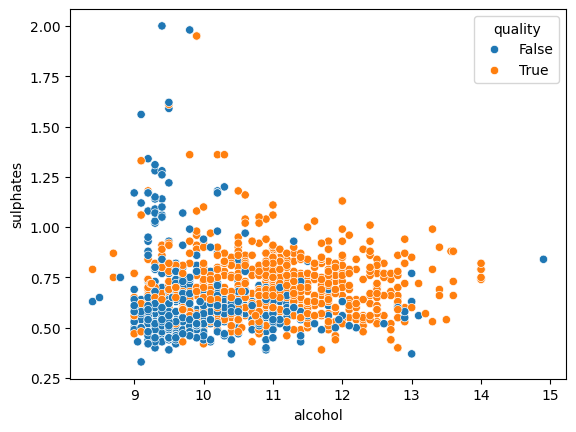

In [ ]:
sns.scatterplot(data=df,x='alcohol',y='sulphates',hue='quality')

**Train Test Split**

train_test_split function used to split the data into training and testing set

train_test_split focus on that column you want to predict,know as target variable .
in this dataset age and salary are the feature and 'purchase' is a target variable
(use copy for more imformation)

In [ ]:
from sklearn.model_selection import train_test_split  #importing the module
x_train , x_test , y_train , y_test = train_test_split(
    df.drop('quality' , axis=1),
    df['quality'], test_size=0.3,
    random_state=0 )

In [ ]:
x_train.shape , x_test.shape

((1119, 2), (480, 2))

**Standard Scale**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#fit the scaler to the train set
scaler.fit(x_train)   #learning the values from x_train.  it means it store the value of mean and standard deviation

#Transform train and test set
x_train_scaler=scaler.transform(x_train)
x_test_scaler=scaler.transform(x_test)


In [ ]:
scaler.mean_ # it will give the mean of each column

array([ 0.66054513, 10.40991957])

In [ ]:
scaler.scale_ # it will give the standard deviation (S.D) of each colum

array([0.17865691, 1.06432379])

NOTE: after transform the dataframe will get the dataframe as numpy array

In [ ]:
x_train_scaler=pd.DataFrame(x_train_scaler,columns=x_train.columns)
x_test_scaler=pd.DataFrame(x_test_scaler,columns=x_test.columns)

In [ ]:
round(x_train.describe())  #here mean is not 0 and std is not 1 because it is not scaled

,sulphates,alcohol
count,1119.0,1119.0
mean,1.0,10.0
std,0.0,1.0
min,0.0,8.0
25%,1.0,10.0
50%,1.0,10.0
75%,1.0,11.0
max,2.0,15.0


In [ ]:
round(x_train_scaler.describe()) #here mean is 0 and std is 1 because after applying the transform scaler

,sulphates,alcohol
count,1119.0,1119.0
mean,0.0,-0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,0.0,1.0
max,7.0,4.0


**Effect of Scaling**

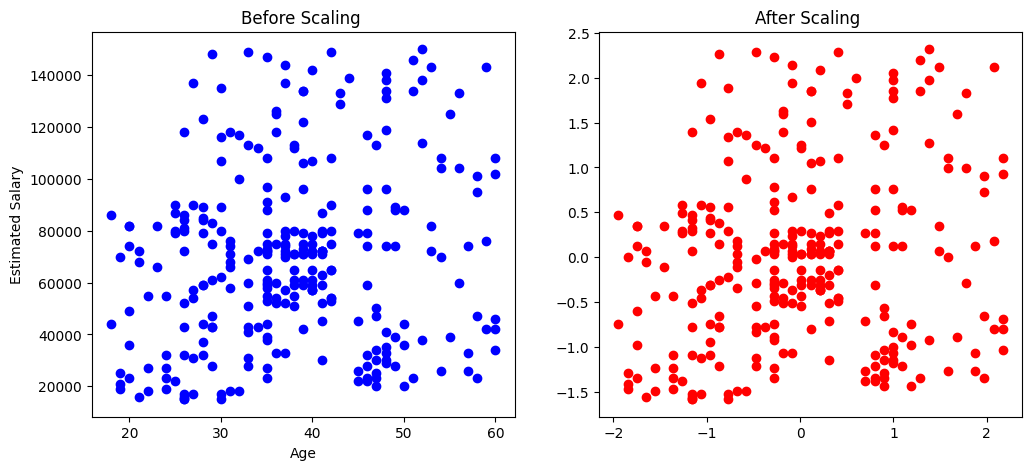

In [ ]:
# fig represents the entire figure.
# ax1 and ax2 represent the two subplots.
# The scatter and set_title methods are called on ax1 and ax2 respectively to plot and set titles for each subplot.
fig , (ax1,ax2) = plt.subplots( ncols=2 , figsize = (12 , 5) )

ax1.scatter( x = x_train['Age'] , y = x_train['EstimatedSalary'],color='blue')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')
ax1.set_title('Before Scaling ')
ax2.scatter(x_train_scaler['Age'] , x_train_scaler['EstimatedSalary'],color='red')
ax2.set_title('After Scaling ')

plt.show()

ploting by kdeplot in Seaborn stands for Kernel Density Estimate plot.

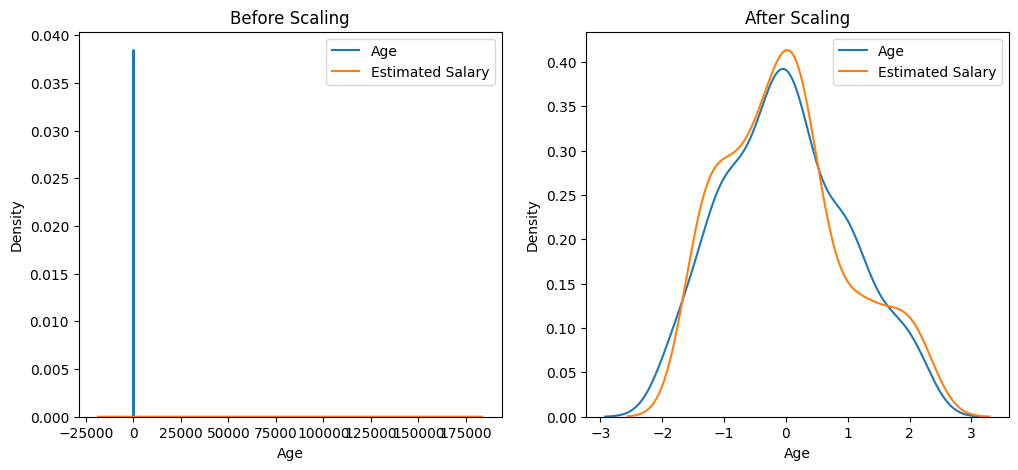

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1, label='Age')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1, label='Estimated Salary')
ax1.legend()  # Add legend to differentiate the KDE plots

# After scaling
ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaler['Age'], ax=ax2, label='Age')
sns.kdeplot(x_train_scaler['EstimatedSalary'], ax=ax2, label='Estimated Salary')
ax2.legend()  # Add legend to differentiate the KDE plots

plt.show()


**Why Scaling is importand**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_scaler=LogisticRegression()

fit method of the logistic regression model requires two arguments:

The feature data (x_train_scaler), which are the independent variables.
The target data (y_train), which are the dependent variables or labels.

In [ ]:
lr.fit(x_train,y_train)    # # Fit the model on the original training data
lr_scaler.fit(x_train_scaler,y_train)  # # Fit the model on the scaled training data
#here x_train_scaler is a feature with scale dataset

LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test)
y_pred_scaler=lr_scaler.predict(x_test_scaler)

In [ ]:
from sklearn.metrics import accuracy_score
print("Actual ",accuracy_score(y_test , y_pred))
print("Scale ",accuracy_score(y_test , y_pred_scaler))

Actual  0.6583333333333333
Scale  0.8666666666666667
